In [7]:
# This ensures required packages are present, installs if missing.
try:
    import ultralytics, cv2, ffmpeg
except ImportError:
    !pip install ultralytics opencv-python ffmpeg-python --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from ultralytics import YOLO
from pathlib import Path
from IPython.display import Image, display
import urllib.request, os

In [14]:
model1 = YOLO('yolov8n.pt')
model2 = YOLO("yolov8n-seg.pt") 

In [19]:
image_folder = Path("images")

In [17]:
results = model1.predict(source=image_folder, save=True, project='runs/task2', name='multi_detect')


image 1/3 C:\RKS\iiitInternship\iiit-h_cv_internship\Task2_Multiple_Images_and_Metrics\images\image1.jpg: 416x640 2 persons, 2 dogs, 322.3ms
image 2/3 C:\RKS\iiitInternship\iiit-h_cv_internship\Task2_Multiple_Images_and_Metrics\images\image2.jpg: 448x640 12 persons, 7 cars, 5 traffic lights, 212.2ms
image 3/3 C:\RKS\iiitInternship\iiit-h_cv_internship\Task2_Multiple_Images_and_Metrics\images\image3.jpg: 448x640 2 persons, 148.5ms
Speed: 7.1ms preprocess, 227.7ms inference, 16.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to C:\RKS\iiitInternship\iiit-h_cv_internship\Task2_Multiple_Images_and_Metrics\runs\task2\multi_detect


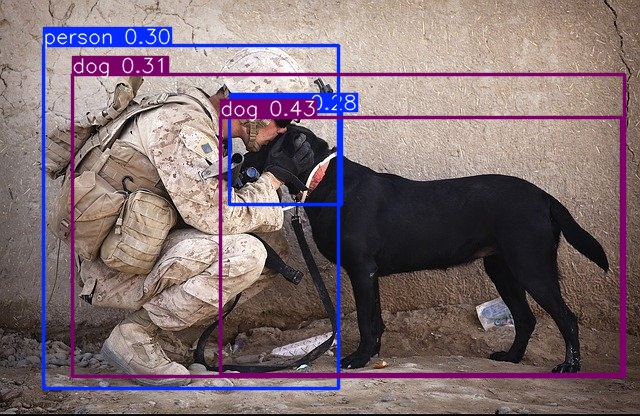

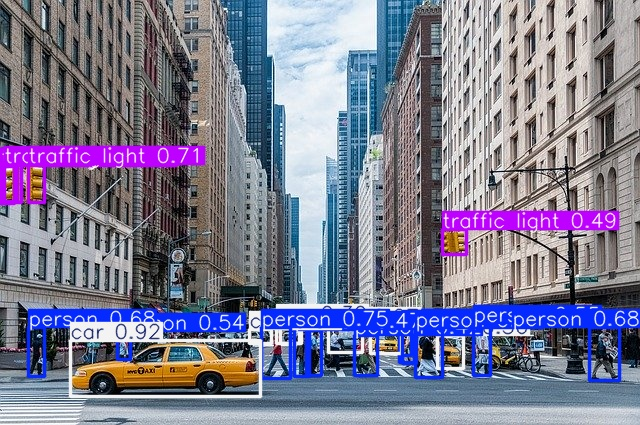

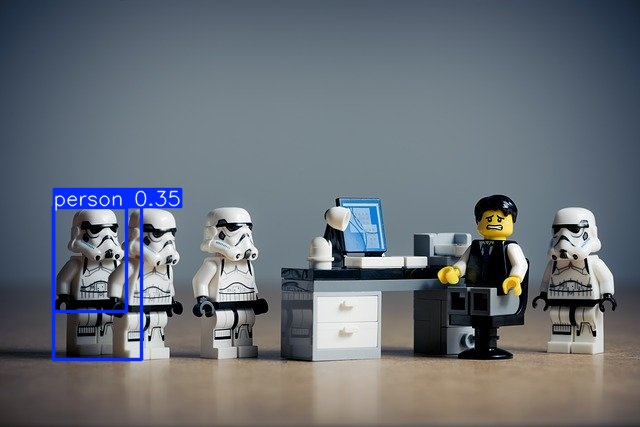

In [20]:
for r in results:
    # r.path is input path (string) — convert to Path
    inp = Path(r.path)
    save_dir = Path(r.save_dir)   # convert to Path
    out_img_path = save_dir / inp.name
    if out_img_path.exists():
        display(Image(filename=str(out_img_path)))
    else:
        print("Output not found for:", inp.name, "expected at", out_img_path)

In [21]:
# print timing/metrics summary (if available)
print("\nSpeed/Timing info (first result):")
if hasattr(results[0], "speed"):
    for k, v in results[0].speed.items():
        print(f"{k}: {v:.2f} ms")
else:
    print("No speed info available in results[0].speed")


Speed/Timing info (first result):
preprocess: 12.88 ms
inference: 322.26 ms
postprocess: 30.62 ms


In [22]:
results2 = model2.predict(source=image_folder, save=True, project='runs/task2', name='multi_detect')


image 1/3 C:\RKS\iiitInternship\iiit-h_cv_internship\Task2_Multiple_Images_and_Metrics\images\image1.jpg: 416x640 1 person, 1 dog, 307.3ms
image 2/3 C:\RKS\iiitInternship\iiit-h_cv_internship\Task2_Multiple_Images_and_Metrics\images\image2.jpg: 448x640 15 persons, 6 cars, 4 traffic lights, 226.0ms
image 3/3 C:\RKS\iiitInternship\iiit-h_cv_internship\Task2_Multiple_Images_and_Metrics\images\image3.jpg: 448x640 1 person, 1 tv, 257.0ms
Speed: 4.6ms preprocess, 263.4ms inference, 45.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to C:\RKS\iiitInternship\iiit-h_cv_internship\Task2_Multiple_Images_and_Metrics\runs\task2\multi_detect2


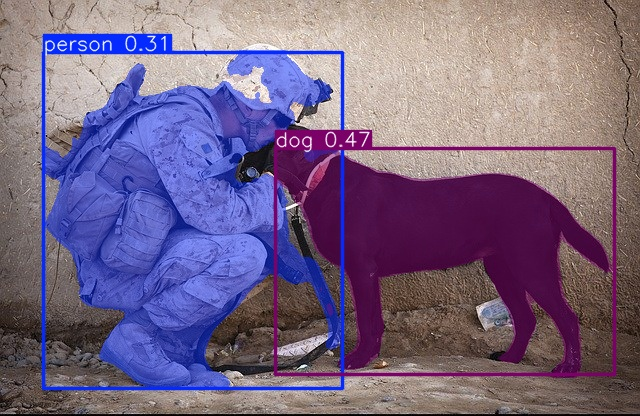

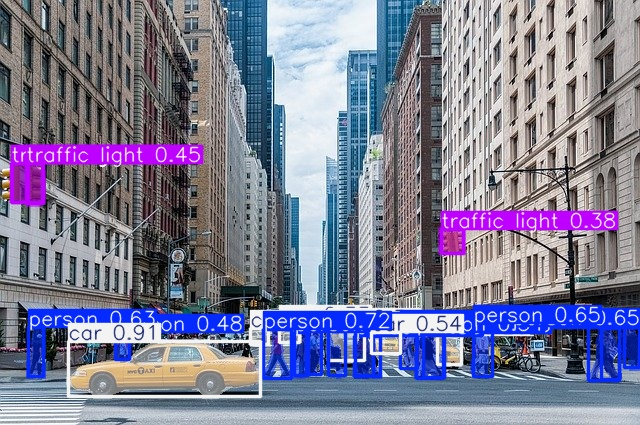

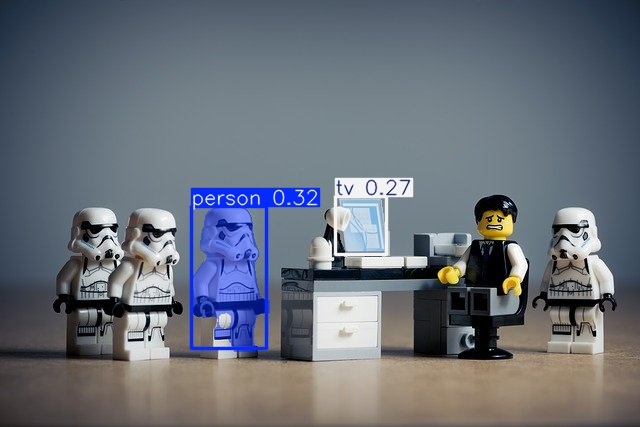

In [23]:
# results is a list of Result objects — show outputs using pathlib safely
for r in results2:
    # r.path is input path (string) — convert to Path
    inp = Path(r.path)
    save_dir = Path(r.save_dir)   # convert to Path
    out_img_path = save_dir / inp.name
    if out_img_path.exists():
        display(Image(filename=str(out_img_path)))
    else:
        print("Output not found for:", inp.name, "expected at", out_img_path)

In [24]:
print("\nSpeed/Timing info (first result):")
if hasattr(results2[0], "speed"):
    for k, v in results2[0].speed.items():
        print(f"{k}: {v:.2f} ms")
else:
    print("No speed info available in results2[0].speed")


Speed/Timing info (first result):
preprocess: 5.62 ms
inference: 307.31 ms
postprocess: 34.02 ms
